In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
data_dir = '../trimmedData'

In [4]:
years = ['04', '06', '08', '12', '14', '16']

In [8]:
# PAC dataframe list
pdfl = []
# Individual dataframe list
idfl = []
for year in years:
    df = pd.read_csv(os.path.join(data_dir, '20{}p.csv'.format(year)))
    df['year'] = int('20' + year)
    pdfl.append(df)
    df = pd.read_csv(os.path.join(data_dir, '20{}i.csv'.format(year)))
    df['year'] = int('20' + year)
    idfl.append(df)
pdf = pd.concat(pdfl)
idf = pd.concat(idfl)
    

In [13]:
print(pdf.dtypes)
print(idf.dtypes)

CID       object
amount     int64
year       int64
dtype: object
CID        object
amount    float64
year        int64
dtype: object


In [20]:
total_df = pd.concat([df, idf])
total_df.head()

,CID,amount,year
0,,1885568.0,2016
1,C00000059,3114.0,2016
2,C00000422,58656.0,2016
3,C00000638,11596.0,2016
4,C00000729,30655.0,2016


In [21]:
pac_cycle_total = pdf.groupby('year').sum()
ind_cycle_total = idf.groupby('year').sum()
cycle_total = total_df.groupby('year').sum()

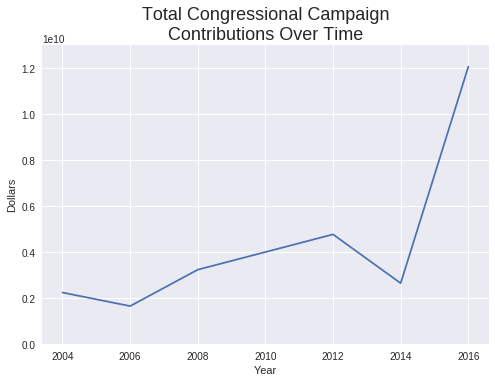

In [32]:
plt.style.use('seaborn')
plt.plot(cycle_total)
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.title("Total Congressional Campaign\nContributions Over Time", size=18)
plt.ylim([0, 1.3e10])
plt.xlabel("Year")
plt.ylabel("Dollars")
plt.show()